In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'2.10.0'

In [3]:
from sklearn.datasets import make_circles

In [4]:
n_samples = 1000
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [5]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [7]:
circles = pd.DataFrame({
    "X0" : X[:, 0],
    "X1" : X[:, 1],
    "Label" : y
})

In [8]:
circles.head()

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


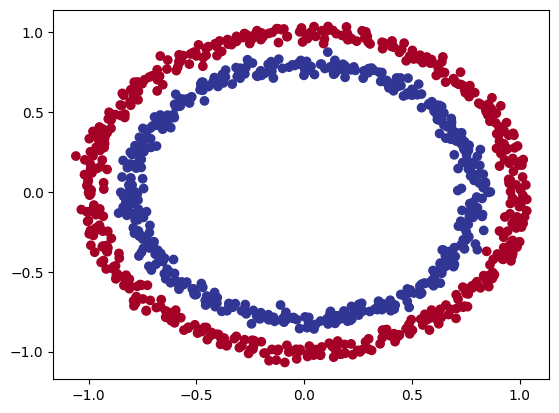

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [10]:
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
len(X), len(y)

(1000, 1000)

In [26]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [12]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['accuracy'])

In [13]:
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.4739 - accuracy: 0.5010
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0567 - accuracy: 0.5090
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.0207 - accuracy: 0.4970
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7184 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.4950


In [14]:
model_1.fit(X, y, epochs = 200, verbose = 0)

KeyboardInterrupt: 

In [ ]:
model_1.evaluate(X, y)

In [34]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['accuracy'])

In [35]:
model_2.fit(X, y, epochs = 200, verbose = 0)

In [36]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5000


[0.6952418088912964, 0.5]

In [48]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

model_4.fit(X, y, epochs = 100, verbose = 0)
model_4.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5090


[0.6980412602424622, 0.5090000033378601]

In [2]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    if len(y_pred[0]) > 1:
        print("doing multiclass classification...")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 944us/step
doing binary classifcation...


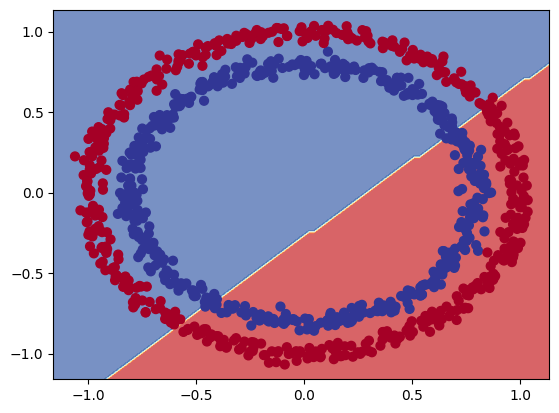

In [49]:
plot_decision_boundary(model_4, X, y)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


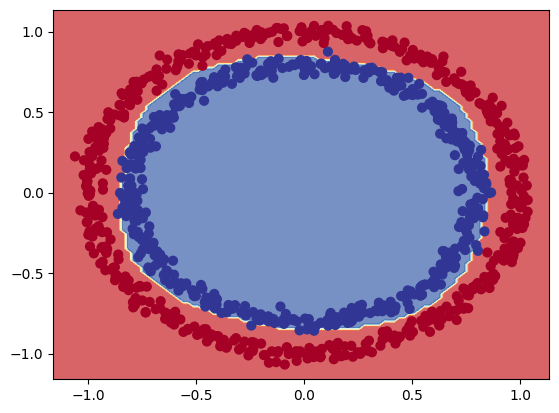

In [44]:
plot_decision_boundary(model_3, X, y)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


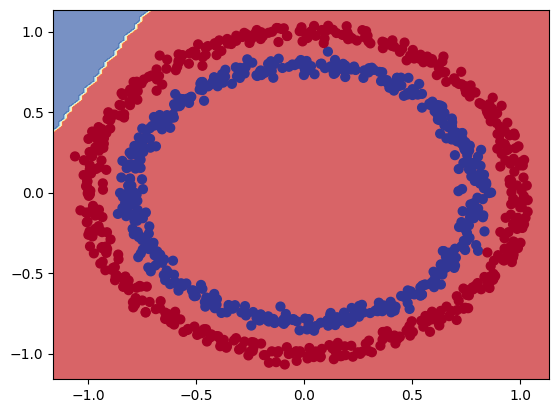

In [45]:
plot_decision_boundary(model_2, X, y)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


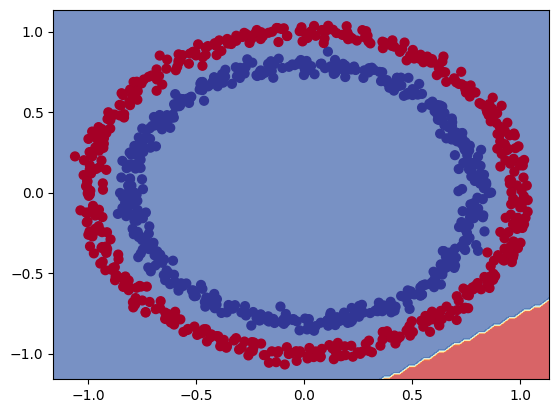

In [46]:
plot_decision_boundary(model_1, X, y)

In [54]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 10

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_4.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_6" "                 f"(type Sequential).
    
    Input 0 of layer "dense_13" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_6" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


In [59]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['mae'])

model_5.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)


Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 333.8784 - mae: 333.8784
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 181.4419 - mae: 181.4419
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 60.2951 - mae: 60.2951
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 90.7128 - mae: 90.7128
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 82.5258 - mae: 82.5258
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.2277 - mae: 47.2277
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 52.5275 - mae: 52.5275
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.5780 - mae: 42.5780
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 44.4653 - mae: 44.4653
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.7786 - mae: 42.7786
Epoch 11/100
5/5 [==============================] - 0s 

In [62]:
y_reg_preds = model_5.predict(y_reg_test)

2/2 [==============================] - 0s 4ms/step


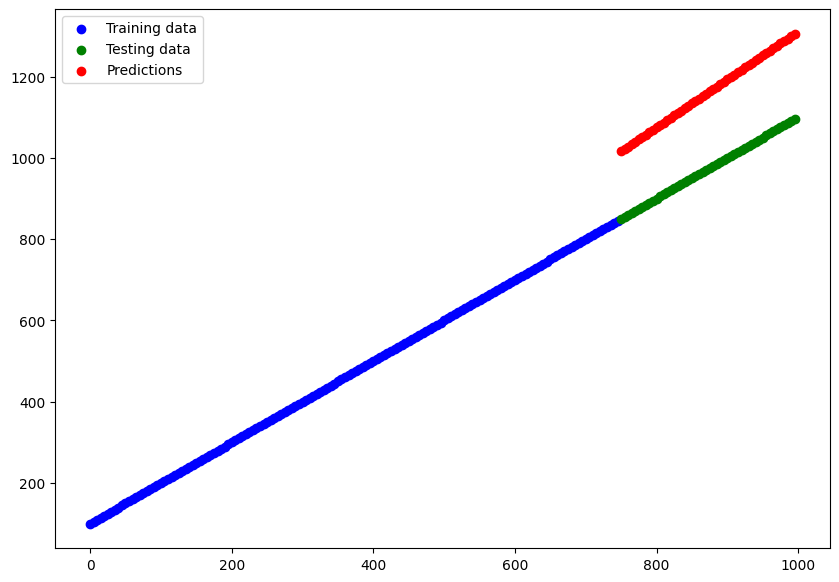

In [63]:
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend()

In [64]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = "linear"),
])

model_6.compile(loss = "binary_crossentropy", 
                optimizer = tf.keras.optimizers.Adam(lr = 0.001), 
                metrics = ['accuracy'])

history = model_6.fit(X, y, epochs = 100)

Epoch 1/100


C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 0s 3ms/step - loss: 4.7582 - accuracy: 0.4750
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6606 - accuracy: 0.4720
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6266 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5583 - accuracy: 0.4690
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5356 - accuracy: 0.4690
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5285 - accuracy: 0.4690
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5243 - accuracy: 0.4690
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5208 - accuracy: 0.4700
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5003 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4858 - accuracy: 0.4690
Epoch 11/100
32/32 [=

313/313 [==============================] - 0s 699us/step
doing binary classifcation...


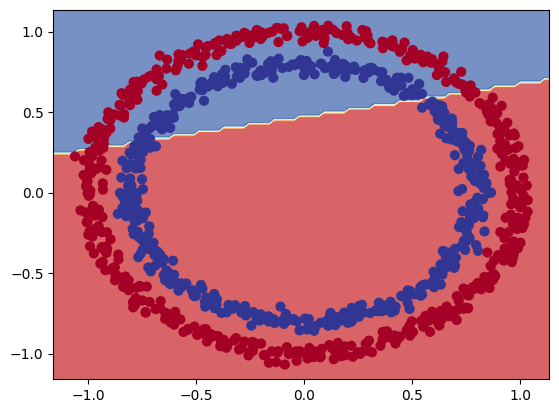

In [65]:
plot_decision_boundary(model_6, X, y)

In [67]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'relu')
])

model_7.compile(loss = 'binary_crossentropy', 
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
                metrics = ['accuracy'])

model_7.fit(X, y, epochs = 100, verbose = 0)
model_7.evaluate(X, y)

C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 0s 2ms/step - loss: 5.0199 - accuracy: 0.4720


[5.019914627075195, 0.47200000286102295]

313/313 [==============================] - 0s 920us/step
doing binary classifcation...


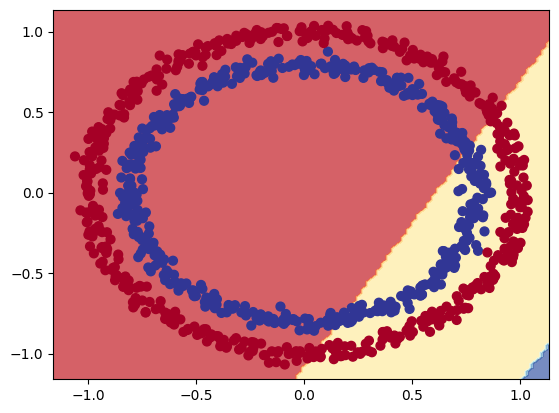

In [68]:
plot_decision_boundary(model_7, X, y)

In [73]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model_8.compile(loss = 'binary_crossentropy', 
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
                metrics = ['accuracy'])

model_8.fit(X, y, epochs = 250)
model_8.evaluate(X, y)

Epoch 1/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 92/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 93/250


32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 246/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 247/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 248/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 249/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 250/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 978us/step
doing binary classifcation...


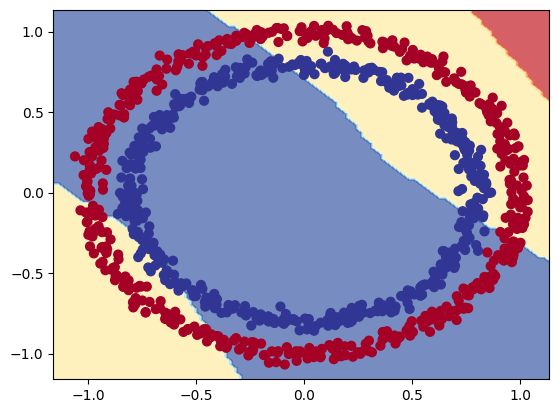

In [74]:
plot_decision_boundary(model_8, X, y)

In [76]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_9.compile(loss = 'binary_crossentropy', 
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
                metrics = ['accuracy'])

history = model_9.fit(X, y, epochs = 250)
model_9.evaluate(X, y)

Epoch 1/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.4970
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.4930
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4910
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.4960
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4880
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4910
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5090
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.4980
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5050
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5040
Epoch 11/

32/32 [==============================] - 0s 4ms/step - loss: 0.3735 - accuracy: 0.9450
Epoch 84/250
32/32 [==============================] - 0s 3ms/step - loss: 0.3677 - accuracy: 0.9410
Epoch 85/250
32/32 [==============================] - 0s 3ms/step - loss: 0.3622 - accuracy: 0.9510
Epoch 86/250
32/32 [==============================] - 0s 3ms/step - loss: 0.3576 - accuracy: 0.9450
Epoch 87/250
32/32 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.9500
Epoch 88/250
32/32 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.9510
Epoch 89/250
32/32 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.9480
Epoch 90/250
32/32 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.9470
Epoch 91/250
32/32 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.9570
Epoch 92/250
32/32 [==============================] - 0s 4ms/step - loss: 0.3261 - accuracy: 0.9480
Epoch 93/250


32/32 [==============================] - 0s 3ms/step - loss: 0.0857 - accuracy: 0.9820
Epoch 246/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0845 - accuracy: 0.9780
Epoch 247/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.9800
Epoch 248/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0838 - accuracy: 0.9810
Epoch 249/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0833 - accuracy: 0.9780
Epoch 250/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9790


[0.08409623801708221, 0.9789999723434448]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


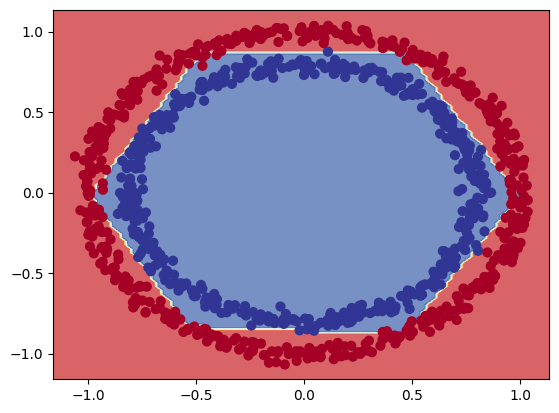

In [77]:
plot_decision_boundary(model_9, X, y)

In [30]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['accuracy'])

In [31]:
model_3.fit(X, y, epochs = 200, verbose = 0)

In [32]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.9850


[0.5953314304351807, 0.9850000143051147]

In [78]:
A = tf.cast(tf.range(-10, 10), tf.float32)

In [79]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

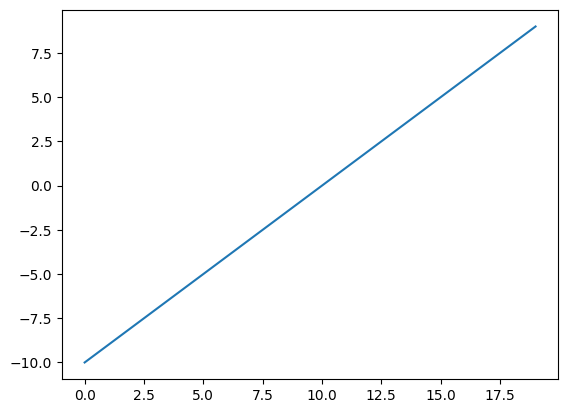

In [80]:
plt.plot(A)

In [81]:
def sigmoid_function(x):
    return 1 / (1 + tf.exp(-x))

In [82]:
sigmoid_function(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

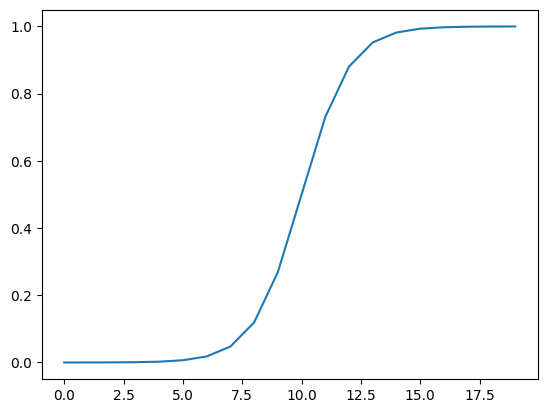

In [83]:
plt.plot(sigmoid_function(A))

In [88]:
def relu_function(x):
    return tf.maximum(0 , x)

In [89]:
relu_function(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

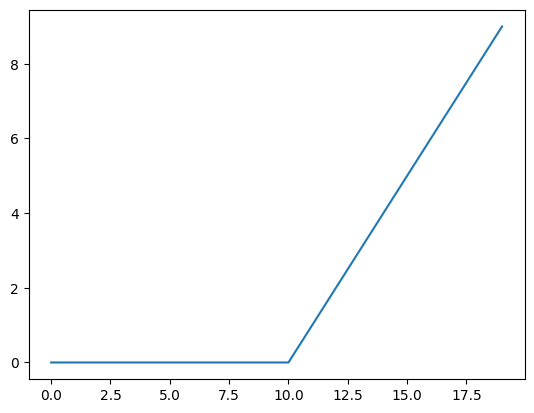

In [90]:
plt.plot(relu_function(A))

In [91]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [92]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [14]:
len(X)

1000

In [14]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [34]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_10.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ['accuracy'])

history = model_10.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.5300
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.5487
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.6012
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6758 - accuracy: 0.5950
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.6062
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6661 - accuracy: 0.5713
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.5800
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.5900
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.6112
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6389 - accuracy: 0.6112
Epoch 11/25
25/25 [

In [35]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 0.9900


[0.11245566606521606, 0.9900000095367432]

313/313 [==============================] - 0s 850us/step
doing binary classifcation...
313/313 [==============================] - 0s 840us/step
doing binary classifcation...


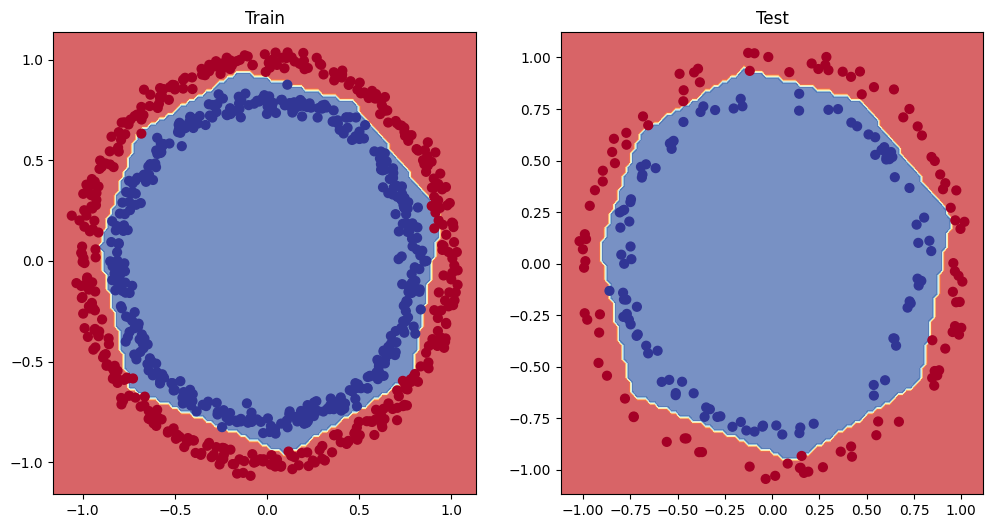

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show()

In [37]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.695947,0.53000
1,0.685109,0.54875
2,0.679825,0.60125
3,0.675754,0.59500
4,0.670716,0.60625
5,0.666075,0.57125
6,0.658538,0.58000
7,0.655909,0.59000
8,0.646964,0.61125
9,0.638901,0.61125


Text(0.5, 1.0, 'Model_10 training curves')

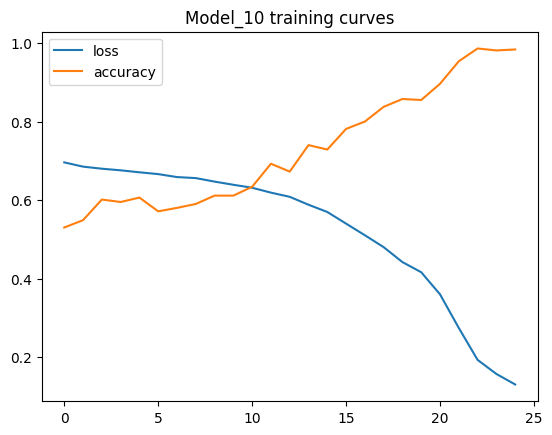

In [39]:
pd.DataFrame(history.history).plot()
plt.title("Model_10 training curves")

In [15]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_11.compile(loss = 'binary_crossentropy',
               optimizer = 'Adam',
               metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

history_11 = model_11.fit(X_train, 
                       y_train, 
                       epochs=100, 
                       callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 2ms/step - loss: 0.6903 - accuracy: 0.5100 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5113 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5163 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5213 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5263 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5250 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5300 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5337 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.9563 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.8413 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 0.8925 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9450 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8587 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.8075 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5525 - accuracy: 0.7462 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7248 - accuracy: 0.5650 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7141 - accuracy: 0.5

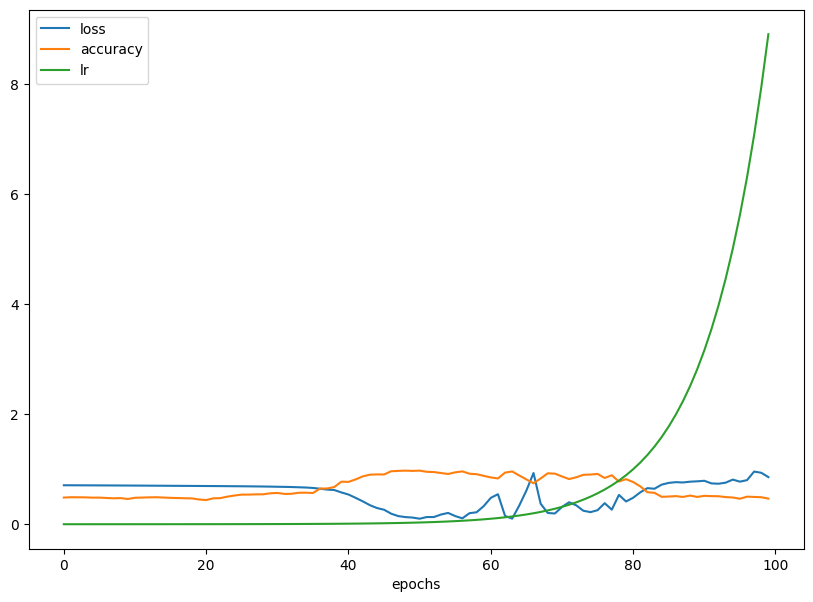

In [44]:
pd.DataFrame(history_11.history).plot(figsize=(10,7), xlabel="epochs");

In [45]:
lrs = 1e-4 * 10 ** (tf.range(100)/20)
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning rate vs. loss')

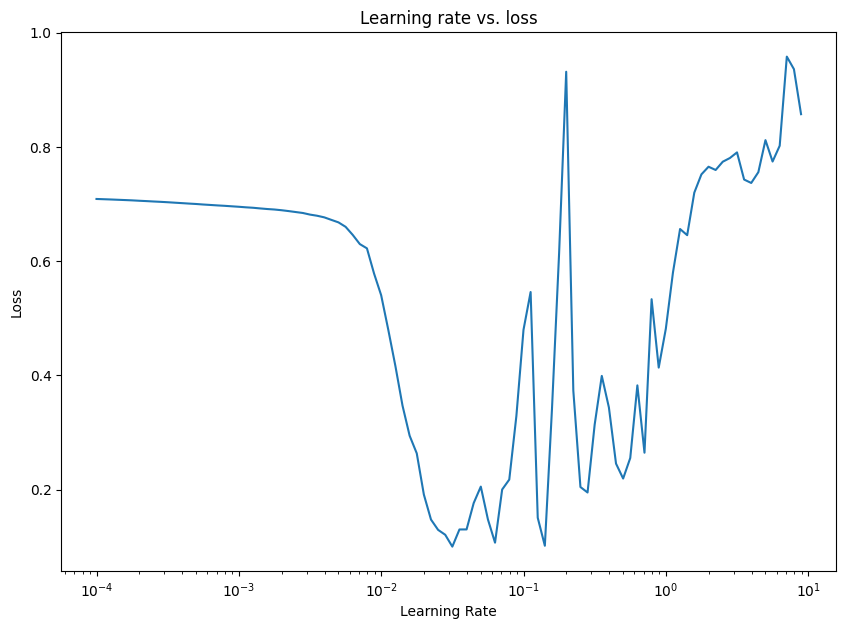

In [47]:
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_11.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

In [17]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_12.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
               metrics = ['accuracy'])

history_12 = model_12.fit(X_train, 
                       y_train, 
                       epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.4925
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5188
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6782 - accuracy: 0.5400
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6570 - accuracy: 0.6212
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6201 - accuracy: 0.7013
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.8163
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 0.8737
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2940 - accuracy: 0.9337
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1982 - accuracy: 0.9762
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1428 - accuracy: 0.9912
Epoch 11/20
25/25 [

In [55]:
model_12.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.1546 - accuracy: 0.9500


[0.15458980202674866, 0.949999988079071]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 791us/step
doing binary classifcation...


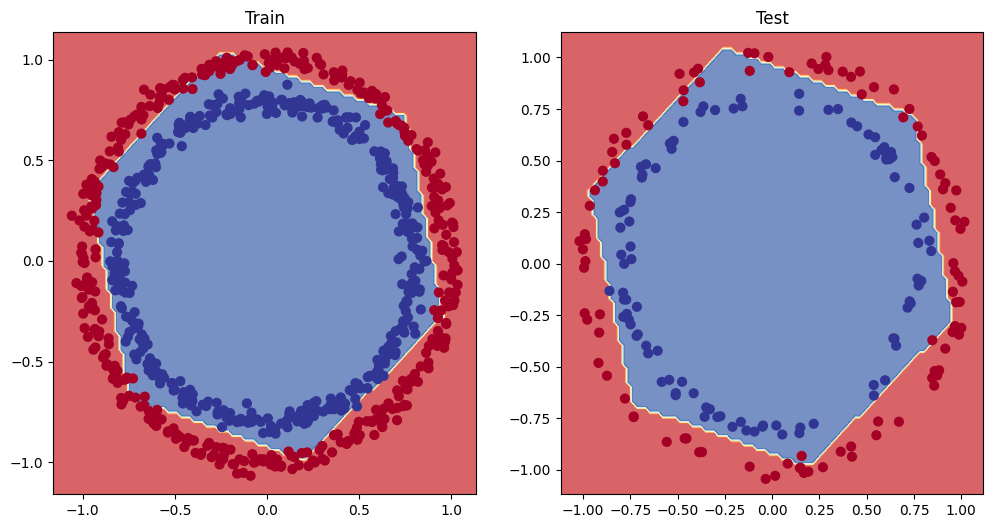

In [56]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_12, X = X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_12, X = X_test, y = y_test)

In [58]:
loss, accuracy = model_12.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss:.2f}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.1546 - accuracy: 0.9500
Model loss on test set: 0.15
Model accuracy on test set: 95.00%


In [18]:
from sklearn.metrics import confusion_matrix

y_preds = model_12.predict(X_test)

confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [67]:
y_preds

array([[0.9594788 ],
       [0.9594788 ],
       [0.9594788 ],
       [0.9594788 ],
       [0.38885835],
       [0.07209653],
       [0.9594788 ],
       [0.2551385 ],
       [0.9594788 ],
       [0.05574958],
       [0.9594788 ],
       [0.76676995],
       [0.9594788 ],
       [0.9594788 ],
       [0.9594788 ],
       [0.9591333 ],
       [0.7608678 ],
       [0.9594788 ],
       [0.04307278],
       [0.9594788 ],
       [0.06945116],
       [0.9594788 ],
       [0.9594788 ],
       [0.9594788 ],
       [0.00841384],
       [0.9594788 ],
       [0.9594788 ],
       [0.48998135],
       [0.28622296],
       [0.9594788 ],
       [0.1297645 ],
       [0.9190026 ],
       [0.94917   ],
       [0.6781986 ],
       [0.1060861 ],
       [0.9465426 ],
       [0.9594788 ],
       [0.6576356 ],
       [0.9594788 ],
       [0.9594788 ],
       [0.9594788 ],
       [0.9594788 ],
       [0.9594788 ],
       [0.01003125],
       [0.9594788 ],
       [0.9594788 ],
       [0.9594788 ],
       [0.011

In [68]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [20]:
y_preds = y_preds.round()

In [72]:
y_preds[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [71]:
confusion_matrix(y_test, tf.round(y_preds))

array([[92,  9],
       [ 1, 98]], dtype=int64)

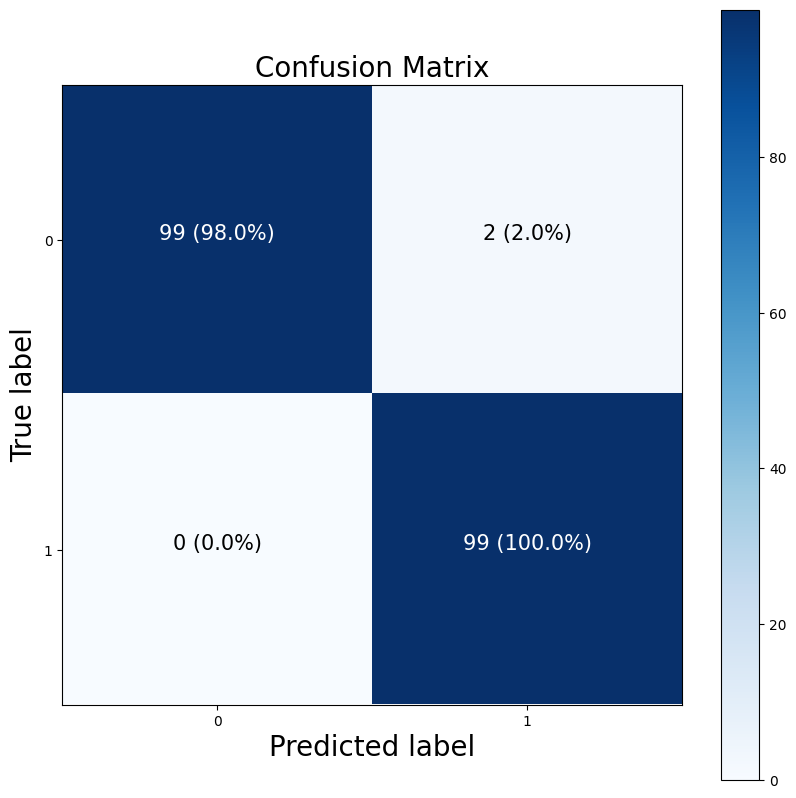

In [21]:
import itertools
figsize = (10, 10)

cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
(train_data.shape, train_labels.shape), (test_data.shape, test_labels.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [4]:
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

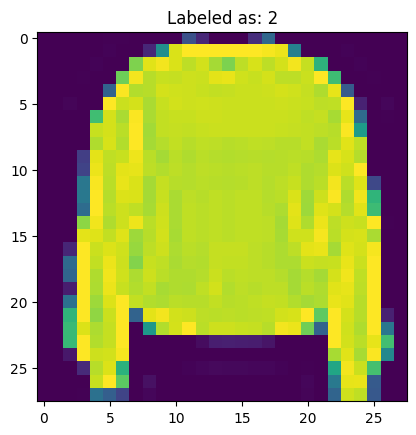

In [6]:
plt.imshow(train_data[7])
plt.title(f"Labeled as: {train_labels[7]}")
plt.show()

In [3]:
class_names = {
    0 : "T-shirt/top",
    1 : "Trouser",
    2 : "Pullover",
    3 : "Dress",
    4 : "Coat",
    5 : "Sandal",
    6 : "Shirt",
    7 : "Sneaker",
    8 : "Bag",
    9 : "Ankle boot"
}

In [8]:
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

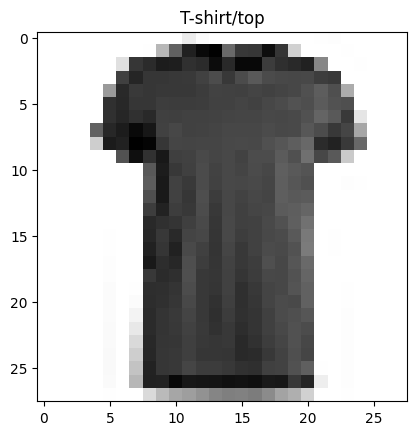

In [9]:
plt.imshow(train_data[17], cmap='binary')
plt.title(class_names[train_labels[17]])

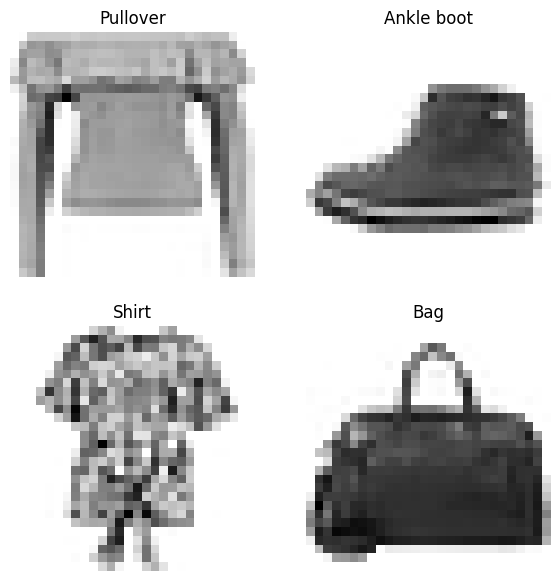

In [5]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [6]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [12]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [4]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_13.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

non_norm_history_13 = model_13.fit(train_data,
                                   train_labels,
                                   epochs = 10,
                                   validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4213 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [14]:
model_13.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [15]:
train_data.min(), train_data.max()

(0, 255)

In [7]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [17]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [18]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_13.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

norm_history_13 = model_13.fit(train_data_norm,
                                   train_labels,
                                   epochs = 10,
                                   validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2789 - accuracy: 0.4484 - val_loss: 0.9121 - val_accuracy: 0.6347
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7640 - accuracy: 0.7288 - val_loss: 0.7335 - val_accuracy: 0.7465
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6654 - accuracy: 0.7739 - val_loss: 0.6615 - val_accuracy: 0.7689
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6263 - accuracy: 0.7859 - val_loss: 0.6299 - val_accuracy: 0.7863
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6057 - accuracy: 0.7904 - val_loss: 0.6269 - val_accuracy: 0.7840
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5901 - accuracy: 0.7959 - val_loss: 0.6157 - val_accuracy: 0.7881
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5806 - accuracy: 0.7982 - val_loss: 0.6227 - val_accurac

<Axes: title={'center': 'Normalized data'}>

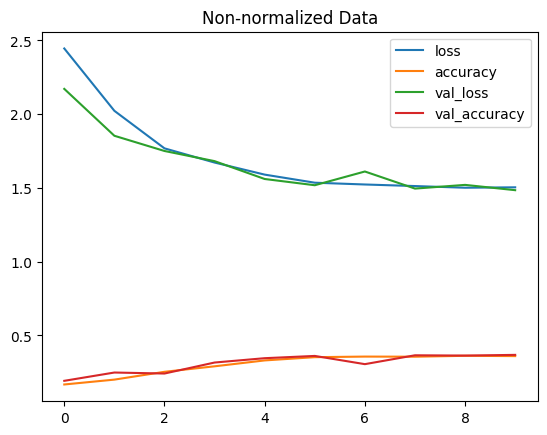

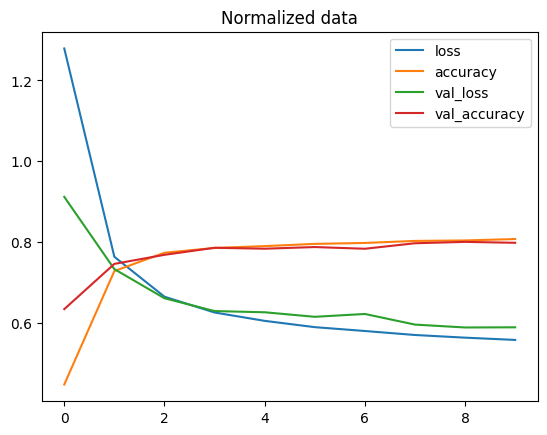

In [19]:
pd.DataFrame(non_norm_history_13.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history_13.history).plot(title="Normalized data")

In [8]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1509 - accuracy: 0.5588 - val_loss: 0.8049 - val_accuracy: 0.7023 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7012 - accuracy: 0.7524 - val_loss: 0.6851 - val_accuracy: 0.7650 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6332 - accuracy: 0.7783 - val_loss: 0.6464 - val_accuracy: 0.7782 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6061 - accuracy: 0.7872 - val_loss: 0.6392 - val_accuracy: 0.7788 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5905 - accuracy: 0.7911 - val_loss: 0.6090 - val_accuracy: 0.7867 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5785 - accuracy: 0.7947 - val_loss: 0.6181 - val_accuracy: 0.7841 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

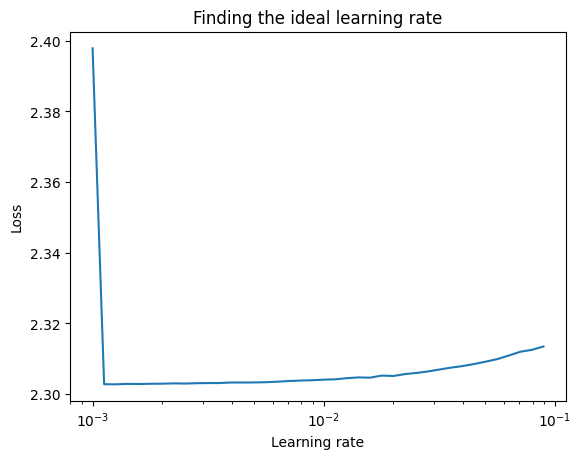

In [21]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0134 - accuracy: 0.6400 - val_loss: 0.6771 - val_accuracy: 0.7684
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6193 - accuracy: 0.7861 - val_loss: 0.6204 - val_accuracy: 0.7828
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5721 - accuracy: 0.8031 - val_loss: 0.5928 - val_accuracy: 0.7969
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5491 - accuracy: 0.8117 - val_loss: 0.5614 - val_accuracy: 0.8093
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5362 - accuracy: 0.8142 - val_loss: 0.5940 - val_accuracy: 0.7907
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5245 - accuracy: 0.8192 - val_loss: 0.5624 - val_accuracy: 0.8092
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5178 - accuracy: 0.8223 - val_loss: 0.5524 - val_accuracy:

In [10]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes), 
           xticklabels=labels,
           yticklabels=labels)

    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    threshold = (cm.max() + cm.min()) / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

In [11]:
y_probs = model_14.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [12]:
y_probs[:5]

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 8.972538e-14, 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [13]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [14]:
y_preds = y_probs.argmax(axis=1)

In [15]:
y_preds[:10]

array([9, 2, 1, 1, 2, 1, 4, 4, 8, 7], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels, y_pred = y_preds)

array([[700,  40,  45,  44,  59,   0,  97,   0,  14,   1],
       [  0, 975,   6,   9,   7,   0,   2,   0,   1,   0],
       [ 11,  26, 595,   2, 334,   0,  30,   0,   2,   0],
       [ 35, 148,  10, 616, 170,   0,  15,   0,   6,   0],
       [  0,   9,  44,   0, 940,   0,   5,   0,   2,   0],
       [  0,   0,   0,   0,   0,  79,   2, 102, 314, 503],
       [116,  15, 125,  20, 514,   0, 193,   0,  16,   1],
       [  0,   0,   0,   0,   0,   0,   0, 719,  51, 230],
       [  0,   2,   2,  11,  29,   0,  41,   2, 911,   2],
       [  0,   0,   0,   0,   0,   0,   2,   8,   6, 984]], dtype=int64)

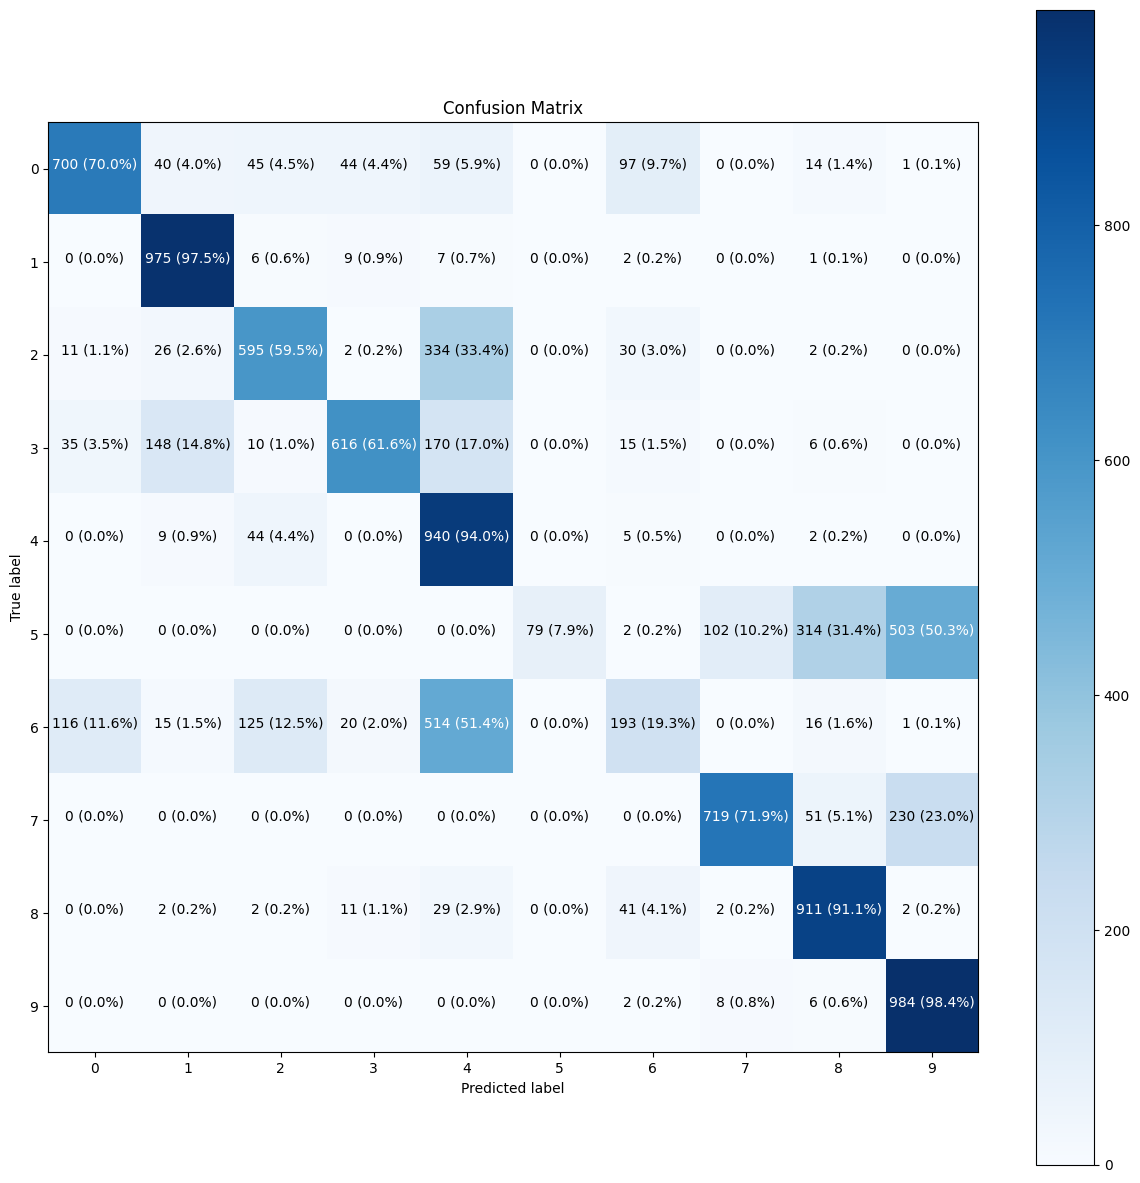

In [17]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [18]:
import random

def plot_random_image(model, images, true_labels, classes):
    i = random.randint(0, len(images))

    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    plt.imshow(target_image, cmap=plt.cm.binary)

    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
               color=color)

1/1 [==============================] - 0s 21ms/step


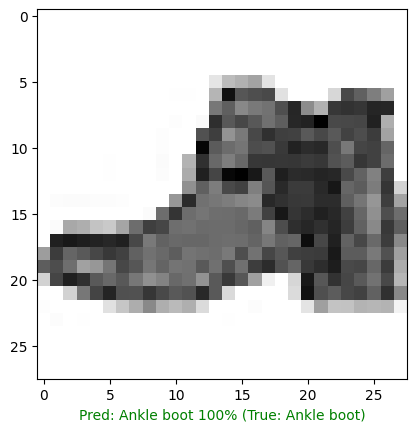

In [23]:
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

In [20]:
model_14.layers

In [12]:
model_14.layers[1]

In [25]:
weights, biases = model_14.layers[1].get_weights()

In [27]:
weights, weights.shape

(array([[ 0.5113043 ,  0.13467672,  0.04944811, -0.51405716],
        [ 0.83602357,  0.24098396, -0.64825904, -0.4074771 ],
        [ 0.48724896,  0.9334853 , -0.97714716, -0.5977433 ],
        ...,
        [-0.9197099 ,  0.31755558, -0.05681315, -0.38007063],
        [-0.5859295 ,  0.09357873,  0.3214952 , -0.48714375],
        [ 0.02210201,  0.15627466, -0.14875458, -0.12601253]],
       dtype=float32),
 (784, 4))

In [26]:
biases, biases.shape

(array([ 1.0705539 , -0.05810701,  0.13487233,  0.82291216], dtype=float32),
 (4,))

In [28]:
model_14.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


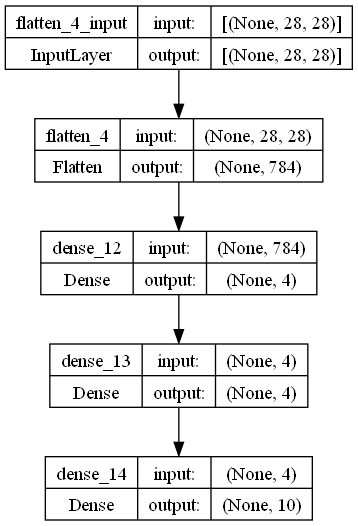

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)